# Project: 30_days_of_ML_Competition

## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ready">Prepare Data For ML</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
sns.set_style("whitegrid")
import lightgbm as lgb
from sklearn.model_selection import RepeatedKFold
import optuna
pd.options.display.max_colwidth = 250
pd.options.display.max_columns = 50

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [2]:
# loading CSV files in to 3 Dataframes  //df, df_test and sub//

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [3]:
#checking 5 rows sample from Dataframes

df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
df_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [5]:
sub.head()

,id,target
0,0,0.5
1,5,0.5
2,15,0.5
3,16,0.5
4,17,0.5


In [6]:
y = df.target

### Assessing Data

In [7]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [8]:
df_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

In [9]:
#checking Dataframe shape (number of rows and columns)
df.shape, df_test.shape

((300000, 26), (200000, 25))

In [10]:
#checking more information and descriptive statistics

df.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [11]:
df.describe(include="O")

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,193130,154824,253886,263356,294737,149340,290511,276040,111103,71249


In [12]:
df_test.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,249970.884580,0.526858,0.460882,0.491686,0.496263,0.492200,0.509944,0.468050,0.537617,0.497587,0.474630,0.473625,0.473589,0.492756,0.508303
std,144169.245904,0.230506,0.213896,0.252852,0.219304,0.240251,0.228100,0.210167,0.218197,0.239337,0.217558,0.255307,0.221844,0.247105,0.222977
min,0.000000,-0.117993,-0.069316,-0.056095,0.130655,0.255903,0.045921,-0.224613,0.203763,-0.260236,0.117894,0.048734,0.052615,-0.074201,0.151052
25%,125316.750000,0.405787,0.310536,0.302189,0.328865,0.284188,0.353682,0.342813,0.356482,0.332762,0.306940,0.274991,0.308495,0.288094,0.300697
50%,249997.000000,0.496602,0.427656,0.503075,0.464590,0.395080,0.488378,0.429819,0.505216,0.438716,0.434610,0.460042,0.433857,0.422065,0.472446
75%,374649.750000,0.666389,0.615041,0.648234,0.663401,0.697252,0.668586,0.573861,0.703289,0.605368,0.610768,0.690143,0.642201,0.711038,0.758496
max,499995.000000,1.058434,0.887253,1.034687,1.039558,1.055423,1.067641,1.111540,1.032823,1.040208,0.982928,1.055955,1.071445,0.975032,0.906013


In [13]:
df_test.describe(include="O")

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,128830,103174,169377,175480,196535,100175,193519,183796,74310,46984


In [14]:
# checking for NaN values patients

df.isnull().sum().sum(),df_test.isnull().sum().sum() 

(0, 0)

In [15]:
#checking for duplicated rows 

df.duplicated().sum()

0

<a id='clean'></a>

## Data Cleaning

In [16]:
# split columns into oridinal,onehot and quantitative 

count = [i for i in df.columns if 'cont' in i]
oridinal = [i for i in df.columns if df[i].nunique()<=5]
onehot = [i for i in df.columns if np.logical_and(df[i].nunique()>5,'cat' in i)]
cat = oridinal + onehot

# count + target
co = count.copy()
co.append("target")

### Remove outloiers

In [17]:
mean = df.target.mean()
std =  df.target.std()
cut_off = std*3
lower, upper = mean -cut_off , mean +cut_off
outliers = df[(df.target <lower)|(df.target >upper)]
df = df.drop(outliers.index)

### Change categorical variables data type to category to decrease memory usage

In [18]:
for i in cat:
    df[i] = df[i].astype("category")
    df_test[i] = df_test[i].astype("category")

In [19]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299627 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      299627 non-null  int64   
 1   cat0    299627 non-null  category
 2   cat1    299627 non-null  category
 3   cat2    299627 non-null  category
 4   cat3    299627 non-null  category
 5   cat4    299627 non-null  category
 6   cat5    299627 non-null  category
 7   cat6    299627 non-null  category
 8   cat7    299627 non-null  category
 9   cat8    299627 non-null  category
 10  cat9    299627 non-null  category
 11  cont0   299627 non-null  float64 
 12  cont1   299627 non-null  float64 
 13  cont2   299627 non-null  float64 
 14  cont3   299627 non-null  float64 
 15  cont4   299627 non-null  float64 
 16  cont5   299627 non-null  float64 
 17  cont6   299627 non-null  float64 
 18  cont7   299627 non-null  float64 
 19  cont8   299627 non-null  float64 
 20  cont9   299627 non-null  f

In [20]:
df_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      200000 non-null  int64   
 1   cat0    200000 non-null  category
 2   cat1    200000 non-null  category
 3   cat2    200000 non-null  category
 4   cat3    200000 non-null  category
 5   cat4    200000 non-null  category
 6   cat5    200000 non-null  category
 7   cat6    200000 non-null  category
 8   cat7    200000 non-null  category
 9   cat8    200000 non-null  category
 10  cat9    200000 non-null  category
 11  cont0   200000 non-null  float64 
 12  cont1   200000 non-null  float64 
 13  cont2   200000 non-null  float64 
 14  cont3   200000 non-null  float64 
 15  cont4   200000 non-null  float64 
 16  cont5   200000 non-null  float64 
 17  cont6   200000 non-null  float64 
 18  cont7   200000 non-null  float64 
 19  cont8   200000 non-null  float64 
 20  cont9   200000 non-null  f

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships.


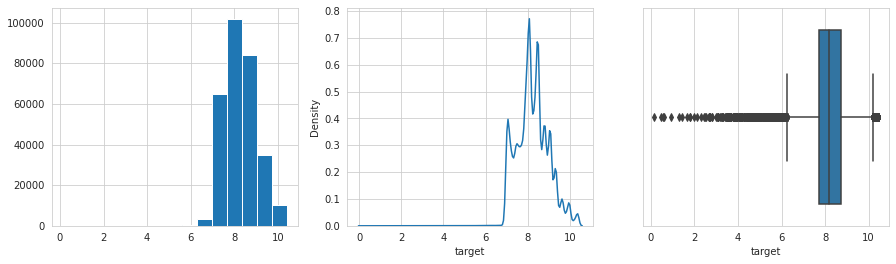

In [21]:
# check target distribution and 5 number summary 

fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].hist(x=y, bins=15)
sns.boxplot(x=y, ax=ax[2])
sns.kdeplot(x=y, ax=ax[1]);

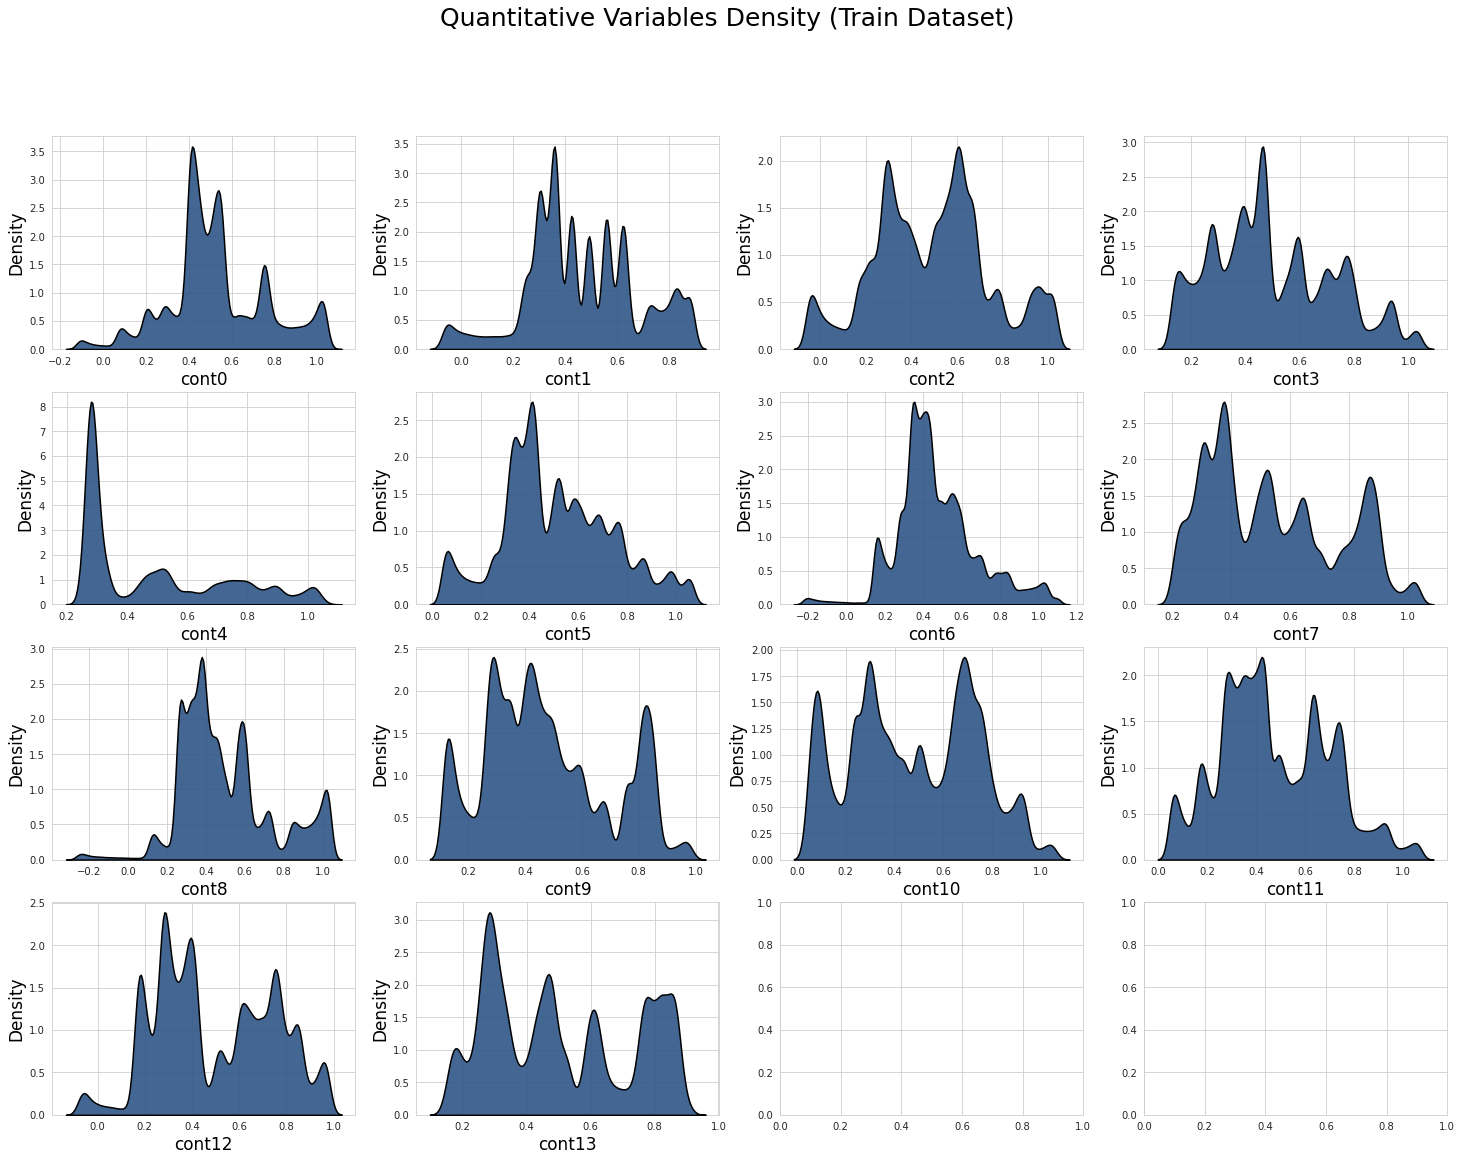

In [22]:
# Quantitative Variables Density plot

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in count:
    sns.kdeplot(df[col], ax=ax[k,j],
                shade=True,
                color='#2f5586', edgecolor='black',
                linewidth=1.5, alpha=0.9,
                zorder=3
               )
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Density", fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Quantitative Variables Density (Train Dataset)', fontsize=25, color="k");

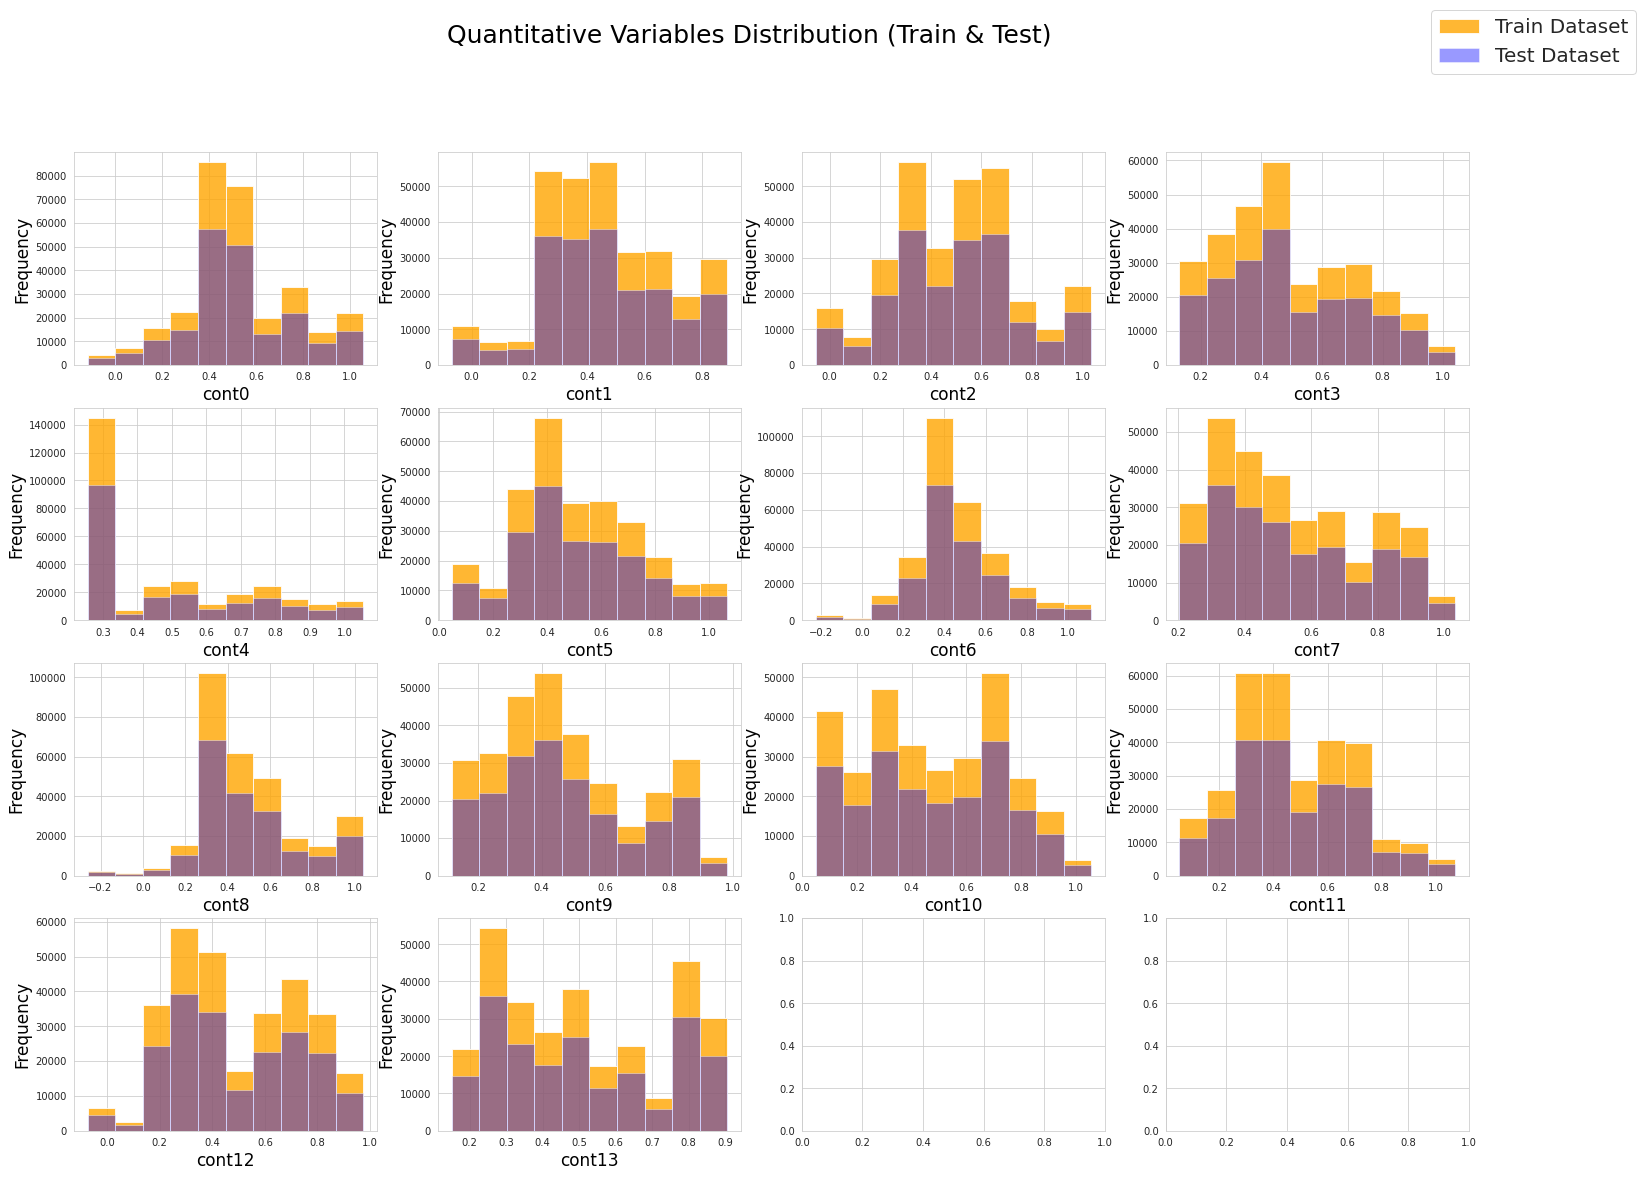

In [23]:
# Quantitative Variables Distribution

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in count:
    ax[k,j].hist(df[col], label="Train Dataset", alpha=0.8, color="orange")
    ax[k,j].hist(df_test[col], label="Test Dataset",alpha=0.4, color="b")
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Frequency", fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Quantitative Variables Distribution (Train & Test)', fontsize=25, color="k")
fig.legend(["Train Dataset","Test Dataset"], fontsize=20);

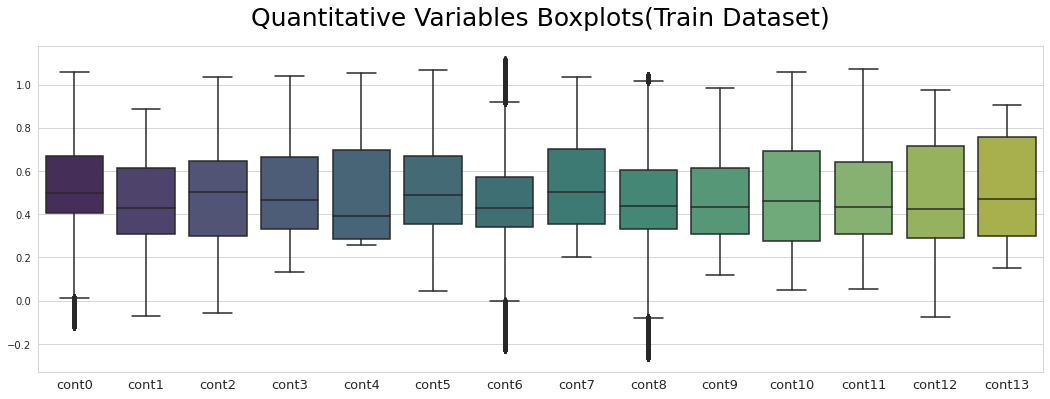

In [24]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df[count],saturation=.5, palette="viridis")
plt.title("Quantitative Variables Boxplots(Train Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

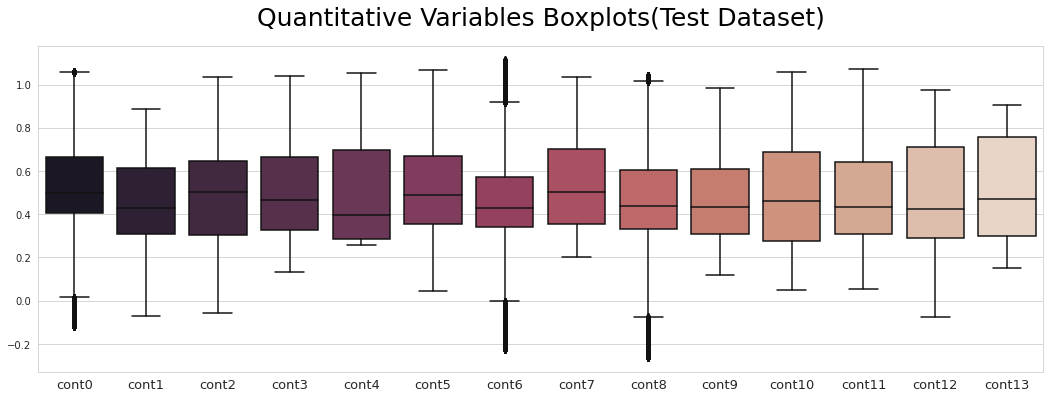

In [25]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df_test[count],saturation=.5, palette="rocket")
plt.title("Quantitative Variables Boxplots(Test Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

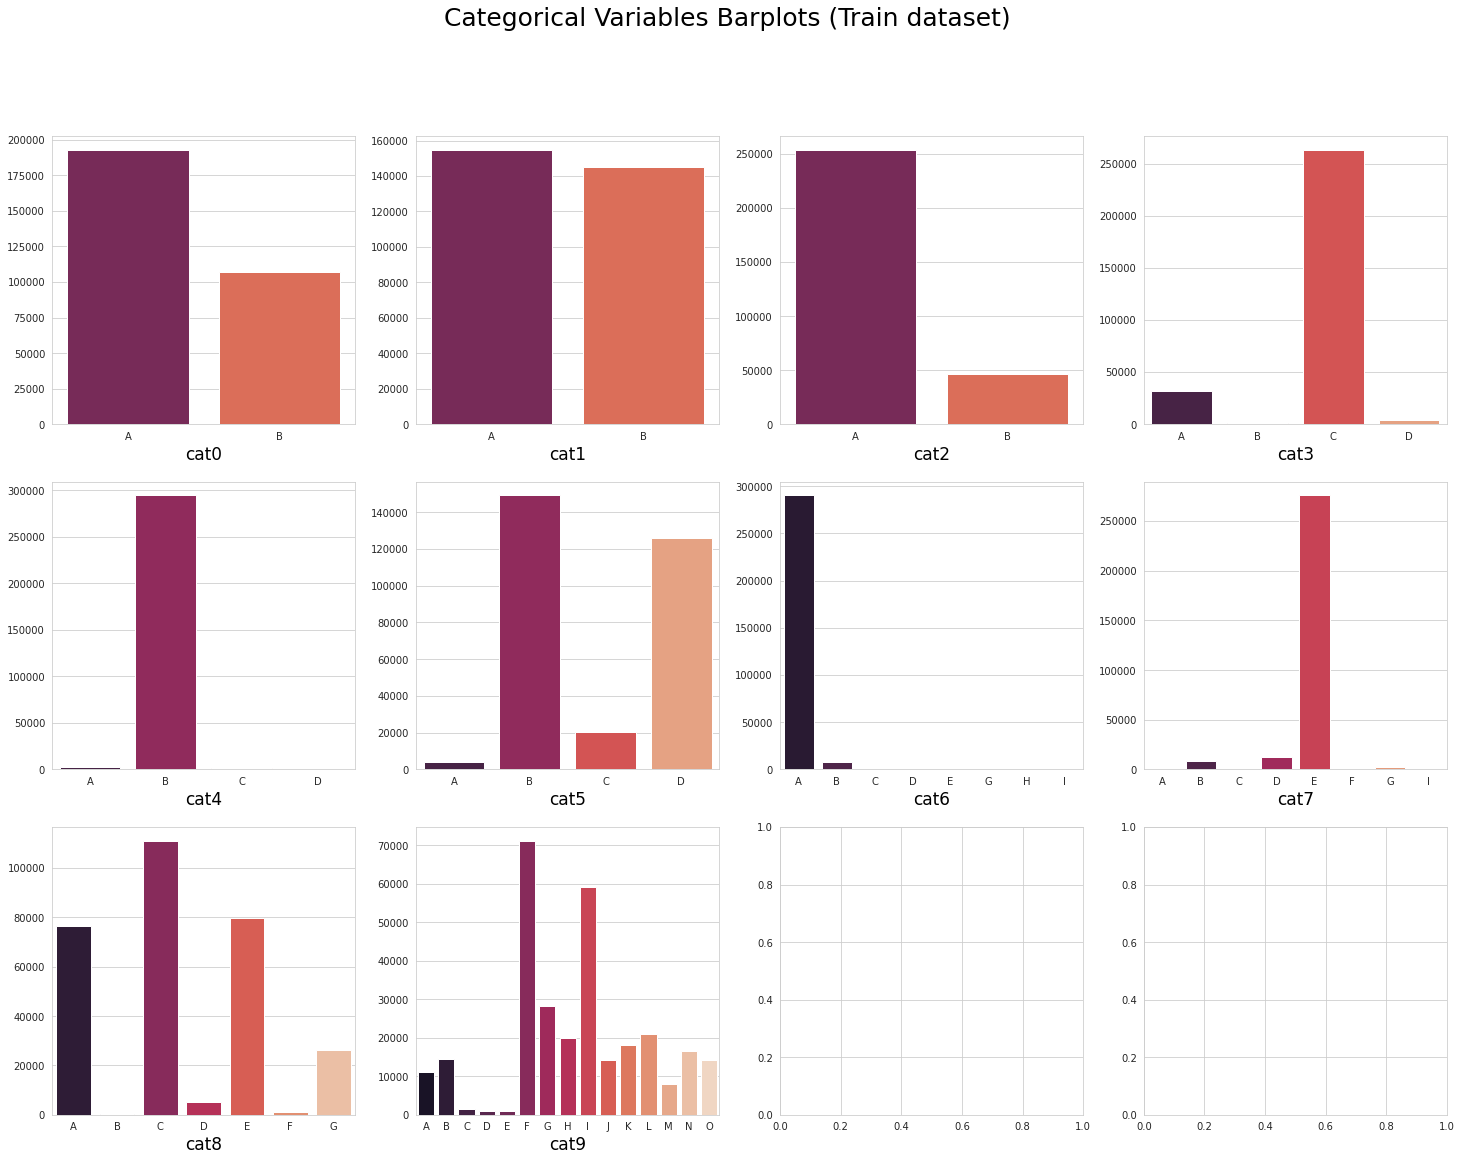

In [26]:
# Categorical Variables Barplots train dataset

fig,ax = plt.subplots(3,4,figsize=(25,18))
k=0
j=0
for col in cat:
    t=df[col].value_counts()
    sns.barplot(x=t.index, y=t.values, label="Train Dataset", ax=ax[k,j], palette="rocket")
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Categorical Variables Barplots (Train dataset)', fontsize=25, color="k");

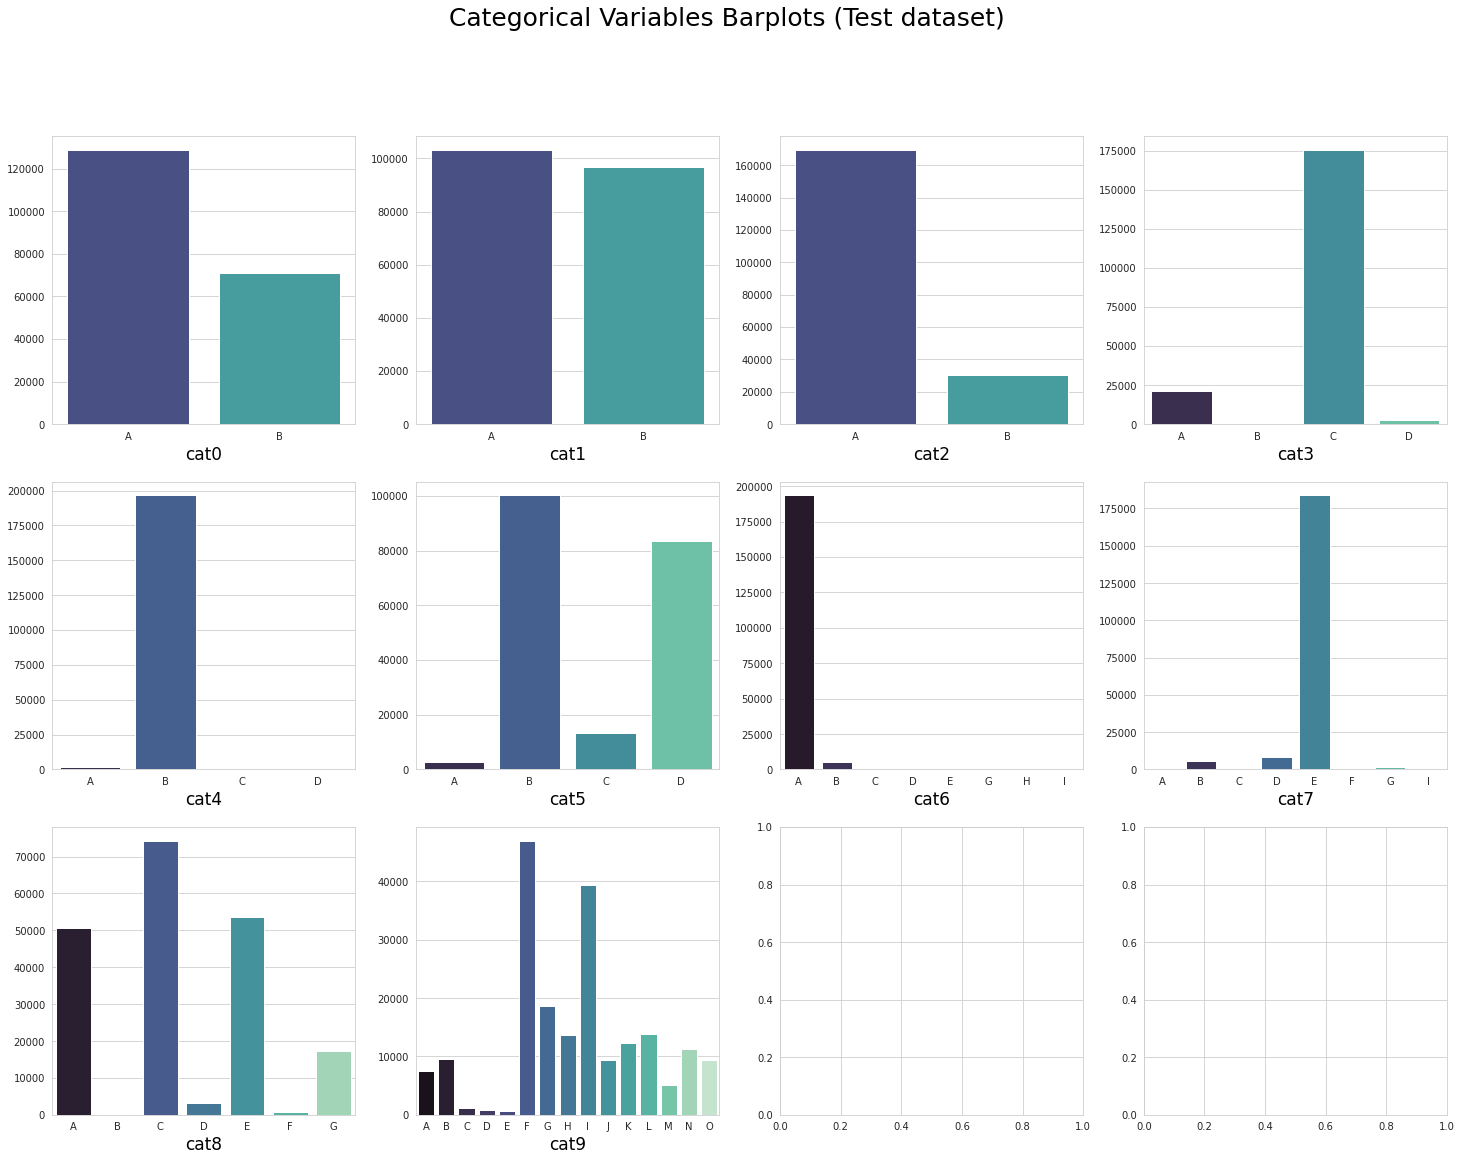

In [27]:
# Categorical Variables Barplots test dataset

fig,ax = plt.subplots(3,4,figsize=(25,18))
k=0
j=0
for col in cat:
    s=df_test[col].value_counts()
    sns.barplot(x=s.index, y=s.values, label="Test Dataset" , ax=ax[k,j], palette="mako")
    ax[k,j].set_xlabel(col, fontsize=17, color="k");
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Categorical Variables Barplots (Test dataset)', fontsize=25, color="k");

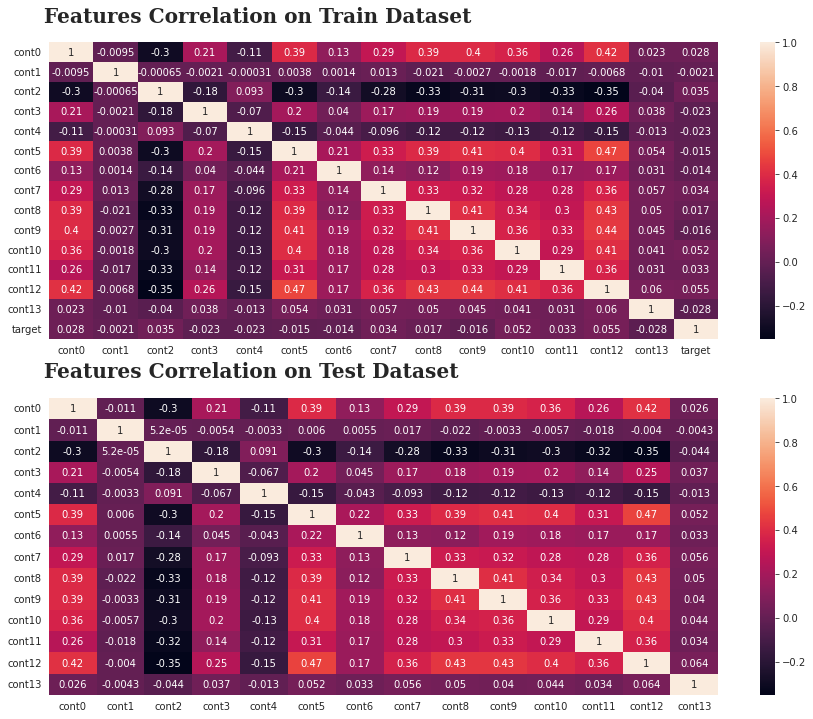

In [28]:
fig,ax = plt.subplots(2,1, figsize=(15,12))
sns.heatmap(df[co].corr(), ax=ax[0], annot=True )
sns.heatmap(df_test[count].corr(),ax=ax[1], annot=True)

ax[0].text(-0.1, -1, 'Features Correlation on Train Dataset', fontsize=20, fontweight='bold', fontfamily='serif')
ax[1].text(-0.1, -1, 'Features Correlation on Test Dataset', fontsize=20, fontweight='bold', fontfamily='serif');

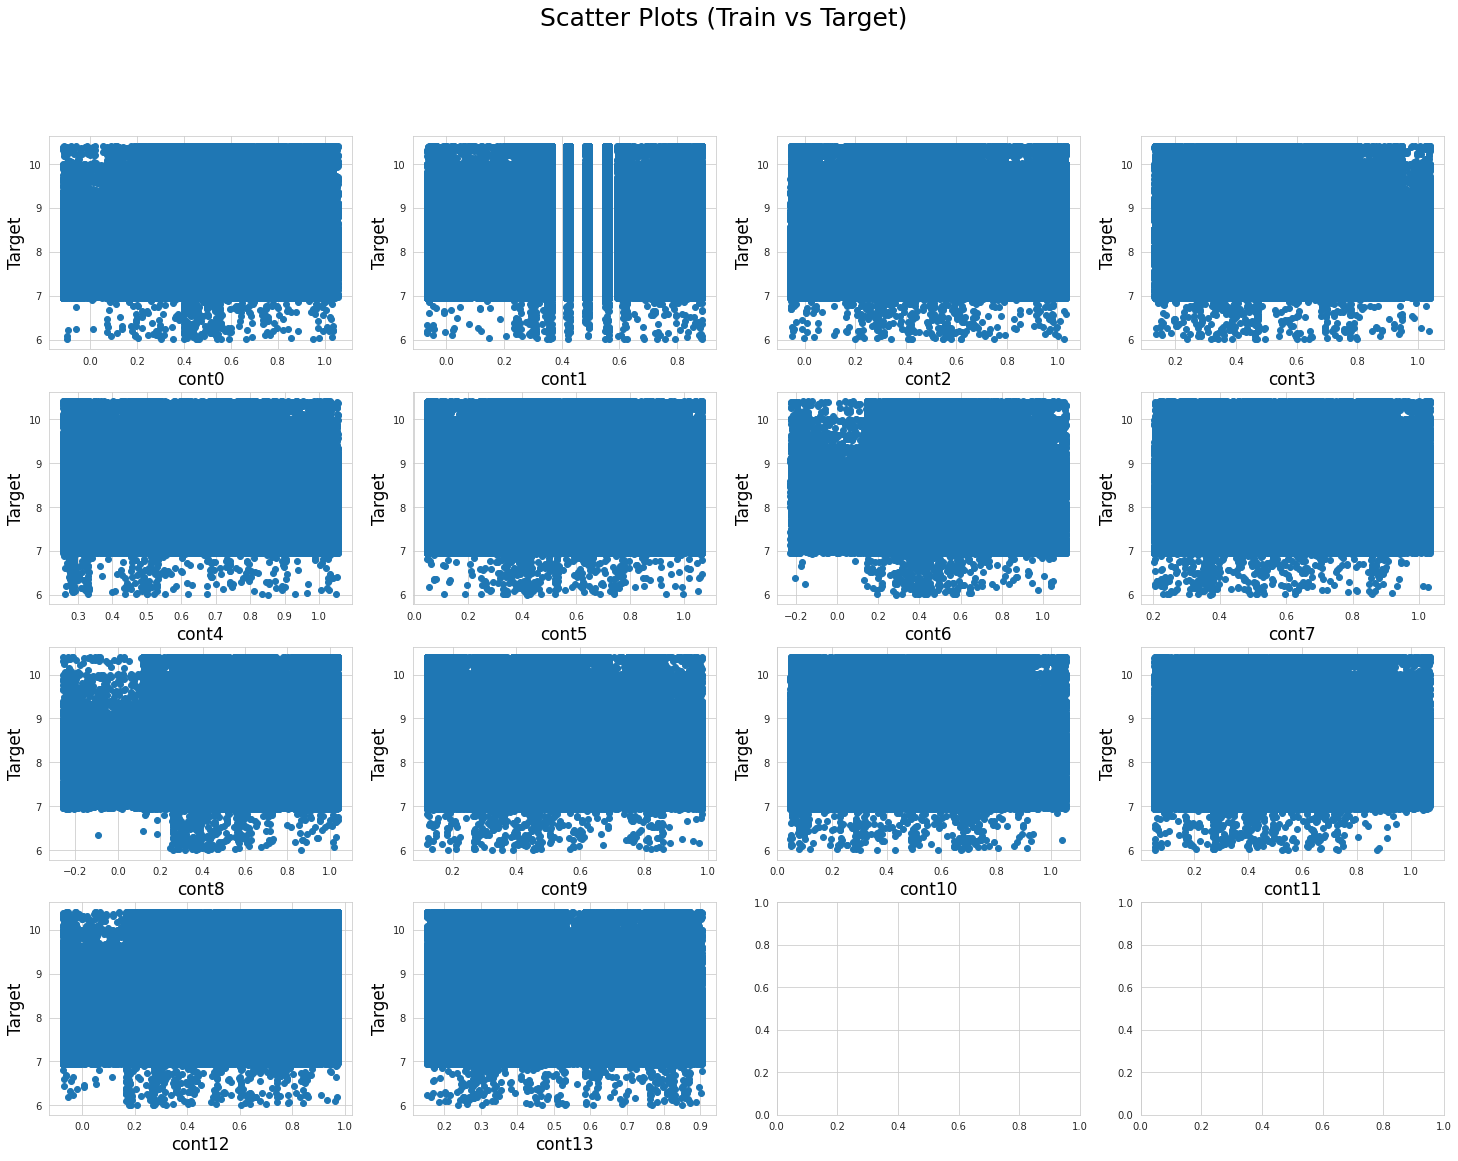

In [29]:
# Categorical Variables Barplots train dataset

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in count:
    ax[k,j].scatter(df[col],df.target)
    #sns.barplot(t.index, t.values, label="Train Dataset", ax=ax[k,j], palette="rocket")
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Target", fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Scatter Plots (Train vs Target)', fontsize=25, color="k");

# Observations:

**- There are 10 categorical features from cat0 to cat9 and 14 continuous features from cont0 to cont13**

**- There is no missing values in both train and test datasets**

**- There is no duplicated values**

**- There is no strong linear correlation between any feature and target value**

<a id='ready'></a>

#  Preparing Data for ML model

### Encode categorical variables

In [30]:
# check if catgories unique values in both train and test datasets are same

for i in onehot:
    if sorted(list(df[i].value_counts().index)) != sorted(list(df_test[i].value_counts().index)):
        print(i)
    else:
        print("No issue")

No issue
No issue
No issue
No issue


In [31]:
# use onehot encoding on categorical variables

X_dummies = pd.get_dummies(df[onehot])
test_dummies = pd.get_dummies(df_test[onehot])


ordinal_encoder = OrdinalEncoder()
X_oridinal = df[oridinal].copy()
test_oridinal = df_test[oridinal].copy()

X_oridinal[oridinal] = pd.DataFrame(ordinal_encoder.fit_transform(X_oridinal[oridinal]))
test_oridinal[oridinal] = pd.DataFrame(ordinal_encoder.fit_transform(test_oridinal[oridinal]))

X = pd.concat([df[count],X_dummies, X_oridinal], axis=1)
test =  pd.concat([df_test[count],test_dummies, test_oridinal], axis=1)
y = df.target
sorted(list(X.columns)) == sorted(list(test.columns))

True

In [32]:
X.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cat6_A,cat6_B,cat6_C,cat6_D,cat6_E,cat6_G,cat6_H,cat6_I,cat7_A,cat7_B,cat7_C,...,cat8_D,cat8_E,cat8_F,cat8_G,cat9_A,cat9_B,cat9_C,cat9_D,cat9_E,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O,cat0,cat1,cat2,cat3,cat4,cat5
0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,2.0,1.0,1.0
1,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,1.0,3.0
2,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,1.0,3.0
3,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1.0,0.0,2.0,1.0,3.0
4,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,2.0,1.0,3.0


### Now we have 3 dataframes (X, y and test)

## Bulding First ML Model

In [33]:
%%time

# Bulid first model
random_state=1

# Split data into train and test datasets
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = random_state, test_size=0.25)


model1 = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.04,random_state=random_state)
model1.fit(train_X, train_y)
preds1 = model1.predict(test_X)
mean_squared_error(preds1, test_y,  squared=False)

CPU times: user 1min, sys: 367 ms, total: 1min
Wall time: 16.5 s


0.7140482002890263

In [34]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
rmse_train = []
rmse_test = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.04,random_state=random_state)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_test.append(mean_squared_error(y_test, y_test_pred, squared=False))
rmse_train = np.array(rmse_train)
rmse_test = np.array(rmse_test)
print("mean rmse is: {}".format(rmse_test.mean()))

mean rmse is: 0.7132116439658487


### Check overfitting and underfitting

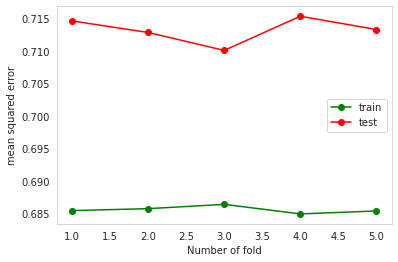

In [35]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, rmse_train, 'o-', color='green', label='train')
plt.plot(folds, rmse_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('mean squared error')
plt.show()

## Hyperparameters Tuning using Hyperopt

**First of all let's import some useful functions from the hyperopt:**

* fmin - the main function for us, it will minimize our functional
* tpe and anneal - optimization approaches
* hp - include different distributions of variables
* Trials - is used for logging

### Lightlgb

In [36]:
from hyperopt import fmin, tpe, hp, anneal, Trials


def objective(params):
#    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=random_state)
    #dtrain = lgb.Dataset(train_x, label=train_y)
    #dvalid = lgb.Dataset(valid_x, label=valid_y)
    
    
    params = {
        #'num_leaves': int(params['num_leaves']),
        'n_estimators': int(params['n_estimators']),
        #'max_depth': int(params['max_depth']),
        'learning_rate': float(params['learning_rate']),
    }
    
    modell = lgb.LGBMRegressor(**params,random_state=random_state)
    modell.fit(train_X, train_y)
    preds = modell.predict(test_X)    
    
    score = mean_squared_error(preds, test_y, squared=False)
    print("Score {:.3f} params {}".format(score, params))
    return score

In [46]:
%%time
##
import warnings
warnings.filterwarnings("ignore")

space = {
    'objective': 'regression',
    'metric':'rmse',
    'boosting':'gbdt',
    'n_estimators': hp.randint('n_estimators', 25, 5000),
    'max_depth':  hp.choice('max_depth', [5, 8, 10, 12, 15]),
    'num_leaves': hp.choice('num_leaves', [100, 250, 500, 650, 750, 1000,1300]),
    'learning_rate': hp.uniform('learning_rate', .001, 0.99),
 }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

Score 0.949 params {'n_estimators': 3993, 'learning_rate': 0.9162003877177181}
Score 0.939 params {'n_estimators': 3864, 'learning_rate': 0.8910430233174277} 
Score 0.739 params {'n_estimators': 228, 'learning_rate': 0.6077827384674588}  
Score 0.769 params {'n_estimators': 4162, 'learning_rate': 0.32131663388935094}
Score 0.897 params {'n_estimators': 4426, 'learning_rate': 0.7623457574778151} 
100%|██████████| 5/5 [02:57<00:00, 35.47s/trial, best loss: 0.7386240319363253]
CPU times: user 11min 24s, sys: 3.24 s, total: 11min 27s
Wall time: 2min 57s


In [47]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'learning_rate': 0.6077827384674588, 'max_depth': 2, 'n_estimators': 228, 'num_leaves': 2}


### 2nd model

In [49]:
rmse_train2 = []
rmse_test2 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model2 = lgb.LGBMRegressor(random_state=random_state,
                         **best
                       )
    model2.fit(X_train, y_train)
    y_train_pred = model2.predict(X_train)
    y_test_pred = model2.predict(X_test)
    rmse_train2.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_test2.append(mean_squared_error(y_test, y_test_pred, squared=False))
rmse_train2 = np.array(rmse_train2)
rmse_test2 = np.array(rmse_test2)
print("mean rmse is: {}".format(rmse_test2.mean()))

mean rmse is: 0.6909476782281743


### Check overfitting and underfitting

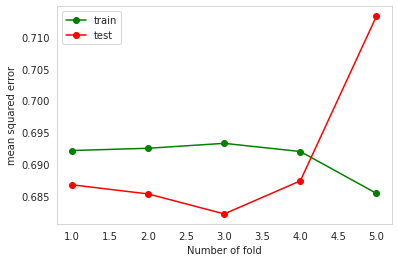

In [50]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, rmse_train2, 'o-', color='green', label='train')
plt.plot(folds, rmse_test2, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('mean squared error')
plt.show()

### 3rd model

In [52]:
%%time

rmse_train3 = []
rmse_test3 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model3 = lgb.LGBMRegressor(random_state=random_state,
                         **best
                       )
    model3.fit(X_train, y_train)
    y_train_pred = model3.predict(X_train)
    y_test_pred = model3.predict(X_test)
    rmse_train3.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_test3.append(mean_squared_error(y_test, y_test_pred, squared=False))
rmse_train3 = np.array(rmse_train3)
rmse_test3 = np.array(rmse_test3)
print("mean rmse is: {}".format(rmse_test3.mean()))

mean rmse is: 0.7189621553627933
CPU times: user 46.6 s, sys: 563 ms, total: 47.2 s
Wall time: 14.4 s


### Check overfitting and underfitting

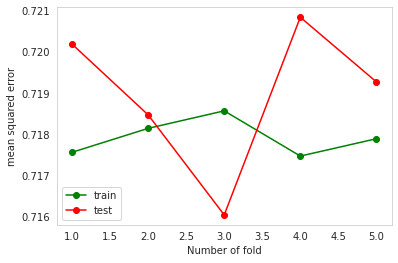

In [53]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, rmse_train3, 'o-', color='green', label='train')
plt.plot(folds, rmse_test3, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('mean squared error')
plt.show()

## Hyperparameters Tuning using optuna

In [54]:
from lightgbm import early_stopping
from lightgbm import log_evaluation
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        #'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = lgb.LGBMRegressor(**param)  
    callbacks = [lgb.early_stopping(10, verbose=0)]#, lgb.log_evaluation(period=0)]
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [55]:
%%time

import warnings
warnings.filterwarnings('ignore')

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-07-02 06:33:05,040] A new study created in memory with name: no-name-c011cd96-464d-440d-b3fb-1f3ce5eb4119
[I 2022-07-02 06:34:11,372] Trial 0 finished with value: 0.714811762978852 and parameters: {'alpha': 0.007227767790301226, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 145}. Best is trial 0 with value: 0.714811762978852.
[I 2022-07-02 06:35:44,299] Trial 1 finished with value: 0.7136792877319501 and parameters: {'alpha': 2.3334721012990234, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 102}. Best is trial 1 with value: 0.7136792877319501.
[I 2022-07-02 06:36:46,051] Trial 2 finished with value: 0.7144092873499548 and parameters: {'alpha': 2.3752611786139997, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.012, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 265}. Best is trial 1 with value: 0.

Number of finished trials: 5
Best trial: {'alpha': 2.3334721012990234, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 102}
CPU times: user 22min 52s, sys: 6.29 s, total: 22min 58s
Wall time: 5min 55s


### 4th model

In [61]:
%%time

best_params = study.best_params
rmse_train4 = []
rmse_test4 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model4 = lgb.LGBMRegressor(random_state=random_state,
                          **best_params)
    model4.fit(X_train, y_train)
    y_train_pred = model4.predict(X_train)
    y_test_pred = model4.predict(X_test)
    rmse_train4.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_test4.append(mean_squared_error(y_test, y_test_pred, squared=False))
rmse_train4 = np.array(rmse_train4)
rmse_test4 = np.array(rmse_test4)
print("mean rmse is: {}".format(rmse_test4.mean()))

mean rmse is: 0.7294092895330292
CPU times: user 1min 5s, sys: 840 ms, total: 1min 6s
Wall time: 19.3 s


### Check overfitting and underfitting

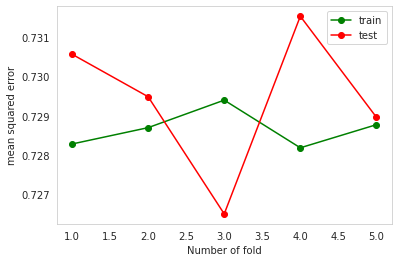

In [63]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, rmse_train4, 'o-', color='green', label='train')
plt.plot(folds, rmse_test4, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('mean squared error')
plt.show()

### 5th model

In [62]:
rmse_train5 = []
rmse_test5 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model5 = lgb.LGBMRegressor(random_state=1,
                         n_estimators= 5200,
                         max_depth = 2,
                         learning_rate= 0.06663768077193145,
                         subsample= 0.7912492436244456,
                         colsample_bytree= 0.1613480080803224,
                         reg_alpha= 12.65778876193281,
                         reg_lambda= 50.25603582806218,
                         min_child_weight= 1,
                        n_jobs=-1
                       )
    model5.fit(X_train, y_train)
    y_train_pred = model5.predict(X_train)
    y_test_pred = model5.predict(X_test)
    rmse_train5.append(mean_squared_error(y_train, y_train_pred, squared=False))
    rmse_test5.append(mean_squared_error(y_test, y_test_pred, squared=False))
rmse_train5 = np.array(rmse_train5)
rmse_test5 = np.array(rmse_test5)
print("mean rmse is: {}".format(rmse_test5.mean()))

mean rmse is: 0.7098009932679727


### Check overfitting and underfitting

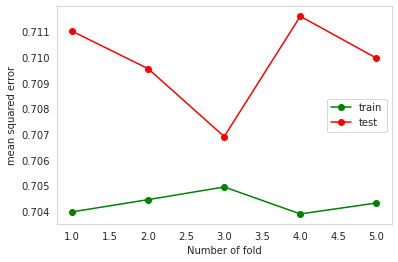

In [64]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, rmse_train5, 'o-', color='green', label='train')
plt.plot(folds, rmse_test5, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('mean squared error')
plt.show()

### Final Model

In [65]:
%%time

final_model = lgb.LGBMRegressor(random_state=1,
                         n_estimators= 5200,
                         max_depth = 2,
                         learning_rate= 0.06663768077193145,
                         subsample= 0.7912492436244456,
                         colsample_bytree= 0.1613480080803224,
                         reg_alpha= 12.65778876193281,
                         reg_lambda= 50.25603582806218,
                         min_child_weight= 1,
                        n_jobs=-1
                       )
final_model.fit(X, y)
final_preds = final_model.predict(test)

CPU times: user 4min 54s, sys: 604 ms, total: 4min 54s
Wall time: 1min 15s


### Save prediction to submission file

In [ ]:
# Save test predictions to file

output = pd.DataFrame({'Id': test.index,
                       'SalePrice': final_preds})
output.to_csv('submission.csv', index=False)